# 1. 引言

SVM，Support Vector Machine，也就是我们中文名的支持向量机，我相信，只要是与机器学习有过照面的童鞋或多或少都听说过这个名字。作为机器学习家族中的老牌成员，其经典自不必说。从原理和特性上讲，**SVM属于有监督学习中线性二分类中的一员，基本思想就是采用最大化间隔策略寻找一个最优决策超平面将所有样本点划分到平面两侧，实现对数据的分类**。

注意几个关键词：线性、二分类、最大化间隔。这么一说，你可能会以为SVM算法只能用于线性可分问题和和二分类问题中，然而，事实却是SVM算法在非线性和多分类场景中有卓越表现，这并不矛盾，至于原因，下文中会陆续解答。

先来说说超平面和最大化间隔，这是SVM算法的根本所在。

# 2. 支持向量与最大化间隔

因为SVM算法探究的是一个线性可分的二分类问题，首要任务就寻找一个超平面。这里的超平面，定义的是$n$维线性空间中维度为$n-1$的子空间，可以把线性空间分割成不相交的两部分。一般的，在数学上，超平面表示如下：


$${w^T}x + b = 0 \tag{1}$$ 

不需要想得太复杂，想想3维以下的空间就可以理解了，例如在二维空间中，超平面就表现为一维的直线，它把平面分成了两块，对于直线的表示，大家都不陌生：$wx + b = 0$，这时候的$x$就是一个一维向量；三维空间中，超平面就是二维的平面，它把空间分成了两块，这个二维平面表示为：${w_1}{x_1} + {w_2}{x_2} = 0$。对于更高的n维空间原理是一样的。

对于数据空间中给定的样本集合$D = \{ ({x_1},{y_1}),({x_2},{y_2}), \cdots ,({x_N},{y_N})\} $，其中${x_i} \in X = {R^n}$，${y_i} \in Y = \{  - 1, + 1\} $，SVM算法的目标就是寻找一个超平面将数据集$D$划分为两个不相交的子集，对于两个子集分别满足当${y_i} =  + 1$时，${w^T}{x_i} + b > 0$，当${y_i} =  - 1$时，${w^T}{x_i} + b < 0$，即：

$${y_i}({w^T}{x_i} + b) > 0 \tag{2}$$

但是，对与任意线性可分数据集，满足这一条件超平面都不可能不只一个，以我们熟悉的二维空间为例，如下图所示：

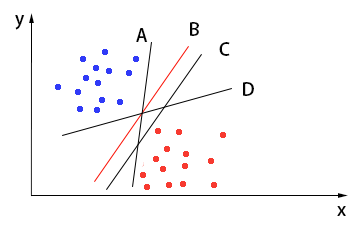

在上面图中，有数量不等的蓝点和红点，分别代表着数据集中的+1类和-1类，在图中我们可以看到，直线A、B、C、D都满足上述两个条件，可以做到能将数据集进行正确分类，但是哪一条才是最优的呢？

从直观上来判断，我相信大家都会选择B（红色那条）最优，具有最强的鲁棒性。因为它与蓝点和红点都有足够的距离，如果选择其他直线，例如C，它与红点非常接近，如果数据稍有波动，就容易越过C线被误判为蓝点所在类别（+1类）。

所以，我们会选择离两边数据集都尽量远的超平面来划分数据空间，这样的误判率会低一些——这就是间隔最大化选取超平面的方法。其中离超平面最近的点，我们称之为**支持向量**。

假设样本$({x_i},y_i)$就是数据集$D$中的支持向量，$({x_i},y_i)$到超平面${w^T}x + b = 0$的几何距离可以表示为：
$$\frac{{|{w^T}{x_i} + b|}}{{\left\| w \right\|}}$$

支持向量机算法的思想就是最大化这个距离，即：
$$\max \frac{{|{w^T}{x_i} + b|}}{{\left\| w \right\|}}\tag{3}$$

式（3）太过于复杂，我们可以进一步化简。因为$x_i$与$y_i$是同号的，所以${y_i}({w^T}{x_i} + b) > 0$，那么式（3）可转化为：
$$\max \frac{{{y_i}({w^T}{x_i} + b)}}{{\left\| w \right\|}} \tag{4}$$

对于式（4）中的分子${{y_i}({w^T}{x_i} + b)}$，许多教材中定义了一个专门的概念，那就是函数距离，当参数$w$和$b$固定时，点与超平面间的间隔越大，函数间隔越大。但函数间隔有一个不好的地方，当参数$w$和$b$按比例缩放时，所描述的超平面不会发生变化，但是函数距离却会跟着按比例缩放。为了克服这一不足，我们可以将函数距离固定为一个确定值，例如缩放到函数距离为1，这样求解出来的$w$和$b$虽然不是原来的$w$和$b$，但是所确定的超平面却是一样的，所以并不会对我们求解支持向量机最优超平面造成影响。那么，式（4）就再次化简为：
$$\max \frac{1}{{\left\| w \right\|}}$$

因为我们刚假设支持向量到超平面的函数距离为1，所以，对于数据集中任意样本到超平面的函数距离都至少为1，求解时必须考虑上这一约束条件。另外，最大化$\frac{1}{{\left\| w \right\|}}$和最小化${\frac{1}{2}{{\left\| w \right\|}^2}}$是等价的，所以，支持向量机最大化间隔可以表示为如下优化问题：
$$\eqalign{
  & \mathop {\min }\limits_{w,b} {\text{    }}\frac{1}{2}{\left\| w \right\|^2}  \tag{5}\cr 
  & s.t.{\text{     }}{y_i}({w^T}{x_i} + b) \geqslant 1,{\text{    }}i = 1,2, \cdots ,N \cr} $$

# 3 优化与求解

很明显，式（5）是一个二次凸优化问题（简单来说，如果目标函数是二次函数且约束函数是线性的，这类问题就是二次凸优化问题），对于这类问题，可以引入拉格朗日乘子法进行转化，将有约束条件的问题转化为无约束条件的问题进行求解。于是式（5）就可以转化为：

$$\eqalign{
  & \mathop {\min }\limits_{w,b} \mathop {{\text{max}}}\limits_\lambda  {\text{    }}L(w,b,\lambda )  \tag{6}\cr 
  & s.t.{\text{     }}{\lambda _i} \geqslant 0,{\text{    }}i = 1,2, \cdots ,N \cr} $$
$$L(w,b,\lambda ) = \frac{1}{2}{\left\| w \right\|^2} - \sum\limits_{i = 1}^N {{\lambda _i}({y_i}({w^T}{x_i} + b)-1)}\tag{7}$$
式中，$\lambda $为拉格朗日乘子。  
如果你不理解从式（5）到式（6）的转化原理和细节，没关系，你姑且可以认为这就是公理，套公式就好了。此时，式（6）对参数$w$和$b$已经是没有约束条件了。接下来，根据拉格朗日的对偶性，我们不妨将式（6）中求最大值的最小值问题转化为求最小值的最大值问题，不理解没关系，姑且认为就是将max和min交换一下位置，对我们的最终结果不会有太大影响，但是却方便求解。转化后，式（6）如下：
$$\eqalign{
  & \mathop {{\text{max}}}\limits_\lambda  \mathop {\min }\limits_{w,b} {\text{    }}L(w,b,\lambda )  \tag{8}\cr 
  & s.t.{\text{     }}{\lambda _i} \geqslant 0,{\text{    }}i = 1,2, \cdots ,N \cr} $$
 在式（7）中，第一步要做的就是求$\mathop {\min }\limits_{w,b} {\text{    }}L(w,b,\lambda )$,也就是$L(w,b,\lambda )$的最小值，我们可以通过求$L(w,b,\lambda )$对$w$和$b$的偏导，并令偏导为$0$的方式来求解。
$$\frac{{\partial L(w,b,\lambda )}}{{\partial w}} = w - \sum\limits_{i = 1}^N {{\lambda _i}{y_i}{x_i}}  = 0$$
$$\frac{{\partial L(w,b,\lambda )}}{{\partial b}} =  - \sum\limits_{i = 1}^N {{\lambda _i}{y_i}}  = 0$$
于是有：
$$w = \sum\limits_{i = 1}^N {{\lambda _i}{y_i}{x_i}} \tag{9}$$
$$\sum\limits_{i = 1}^N {{\lambda _i}{y_i}}  = 0 \tag{10}$$
将拉格朗日函数，也就是式（7）中展开，得：
$$L(w,b,\lambda ) = \frac{1}{2}{\left\| w \right\|^2} - {w^T}\sum\limits_{i = 1}^N {{\lambda _i}{y_i}{x_i}}  - b\sum\limits_{i = 1}^N {{\lambda _i}{y_i}}  + \sum\limits_{i = 1}^N {{\lambda _i}} \tag{11}$$
式（9）代入式（11）再结合（10）进行化简：
$$\displaylines{
  L(w,b,\lambda ) = \frac{1}{2}{\left\| w \right\|^2} - \sum\limits_{i = 1}^N {{\lambda _i}({y_i}({w^T}{x_i} + b) - 1)}  \cr 
   = \frac{1}{2}{\left\| w \right\|^2} - {w^T}\sum\limits_{i = 1}^N {{\lambda _i}{y_i}{x_i}}  - b\sum\limits_{i = 1}^N {{\lambda _i}{y_i}}  + \sum\limits_{i = 1}^N {{\lambda _i}}  \cr 
   = \frac{1}{2}{\left\| w \right\|^2} - {w^T}w - b \cdot 0 + \sum\limits_{i = 1}^N {{\lambda _i}}  \cr 
   =  - \frac{1}{2}{\left\| w \right\|^2} + \sum\limits_{i = 1}^N {{\lambda _i}}  \cr 
   =  - \frac{1}{2}\sum\limits_{i = 1}^N {\sum\limits_{i = 1}^N {{\lambda _i}{\lambda _j}{y_i}{y_j}{x_i}{x_j}} }  + \sum\limits_{i = 1}^N {{\lambda _i}}  \cr} $$
即：
$$\mathop {\min }\limits_{w,b} L(w,b,\lambda ) =  - \frac{1}{2}\sum\limits_{i = 1}^N {\sum\limits_{i = 1}^N {{\lambda _i}{\lambda _j}{y_i}{y_j}{x_i}{x_j}} }  + \sum\limits_{i = 1}^N {{\lambda _i}} $$

至此，式（8）可以转化为如下形式：
$$\eqalign{
  & \mathop {\max }\limits_\lambda  {\text{  }} - \frac{1}{2}\sum\limits_{i = 1}^N {\sum\limits_{i = 1}^N {{\lambda _i}{\lambda _j}{y_i}{y_j}{x_i}{x_j}} }  + \sum\limits_{i = 1}^N {{\lambda _i}}   \tag{12}\cr 
  & s.t.{\text{  }}{\lambda _i} \geqslant 0,{\text{    }}\sum\limits_{i = 1}^N {{\lambda _i}{y_i}}  = 0,{\text{    }}i = 1,2, \cdots ,N \cr} $$
可以看出，这是一个二次规划的问题，问题规模正比于训练样本数，我们常用 SMO(Sequential Minimal Optimization) 算法求解。对于SMO算法求解过程，感觉有些复杂（我也没看明白），不敢多想说，后续完全弄明白再补充。此刻，我们假设通过SMO算法求解出式（12）最优解为${\lambda ^*}$，将${\lambda ^*}$代入式（9）可的参数$w$的最优解：
$${w^*} = \sum\limits_{i = 1}^N {\lambda _i^*{y_i}{x_i}} $$
对于参数$b$，由Kuhn Tuker定理可知，式（12）的最优解必须满足一下最优化条件（KKT条件）：
$${\lambda ^*}[{y_i}({w^*}{x_i} + {b^*}) - 1] = 0 \tag{13}$$
式（13）要成立，就必须是${\lambda ^*}=0$或者${y_i}({w^*}{x_i} + {b^*}) = 1$。对于${\lambda ^*}=0$，肯定是不能成立的，可以通过反证法证明。如果${\lambda ^*}=0$成立，通过式（9）可知必然使得$w^*=0$，而$w^*=0$显然不是式（5）的解，产生矛盾，因此${\lambda ^*}$不能为0。  
所以${y_i}({w^*}{x_i} + {b^*}) = 1$必然适用。对于这个条件，若要满足，$x_i$必然是是支持向量，这也是为什么只有支持向量才能绝对最终的最优超平面的原因。将式（9）代入${y_i}({w^*}{x_i} + {b^*}) = 1$中，然后移项可得：
$${b^*} = {y_j} - \sum\limits_{i = 1}^N {\lambda _i^*{y_i}{x_i}} {x_j}$$
$w^*$和$b^*$求解出来了，最终的最优超平面自然也就确定了。

# 4 总结
本文总结了在数据集线性可分情况下，使用支持向量机算法进行分类的思想——硬间隔最大化。然而，在多数应用中，数据集并非线性可分，如果只是在分类边界附近少数点造成线性不可分，这种情况下需要在硬间隔最大化目标函数基础上，引入松弛变量和惩罚因子，然后通过拉格朗日对偶性求解，这种方法称为软间隔最大化。如果大量样本线性不可分，则需要引入核技巧，往高维空间映射，转化为线性可分。对于这两部分内容，在后续博客中在总结了（吐槽一下，写这类博客，真是耗时、费神、心累）。  
